<a href="https://colab.research.google.com/github/Introducao-Series-Temporais-em-Python/minicurso-SBC-SBSI-2024/blob/main/Evolucao_de_casos_FOSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Gathering Data

In [ ]:
# Dados brutos com todos os tipos de câncer no estado de São Paulo
!gdown 1RZ8MIcQywuZsW_LnGmy60xBAbbhX7CZY --quiet


In [22]:
df = pd.read_csv('pacigeral_12_23.csv')
display(df.head())
df.shape

<ipython-input-22-f877e1fedebe>:1: DtypeWarning: Columns (23,24,25,32,36,37,73,74,75,78,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pacigeral_12_23.csv')


,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
3,5,19,1,RR,SP,3548500,SANTOS,1,2017-08-10,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
4,4,16,1,SP,SP,3548500,SANTOS,2,2020-04-17,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


(1178688, 100)

In [23]:
df.shape

(1178688, 100)

In [34]:
df.index = pd.to_datetime(df.DTDIAG)

In [66]:
lista_replace = ['Pele','Mama','Próstata','Pulmão','Colo de Útero','Coloretal','Coloretal','Coloretal','Not Defined','Estômago','Reto','Tiróide']
toplist = list(set(lista_replace))

df['tipo_cancer'] = df['TOPOGRUP'].replace(['C44','C50','C61','C34','C53','C18','C19','C20','C42','C16','C20','C73'],lista_replace)

df.groupby('tipo_cancer').tipo_cancer.count().sort_values(ascending=False).head(10) / len(df)


tipo_cancer
Pele             0.228854
Mama             0.136985
Próstata         0.103433
Pulmão           0.047110
Colo de Útero    0.046320
Coloretal        0.043390
Not Defined      0.037690
Estômago         0.036604
Reto             0.029200
Tiróide          0.023743
Name: tipo_cancer, dtype: float64

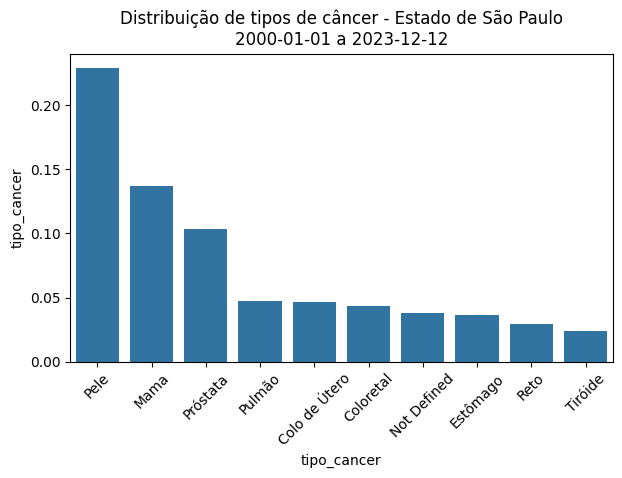

In [52]:
plt.figure(figsize=(7,4))

sns.barplot(df.groupby('tipo_cancer').tipo_cancer.count().sort_values(ascending=False).head(10) / len(df))
plt.title('Distribuição de tipos de câncer - Estado de São Paulo\n' + str(df.DTDIAG.min()) + ' a ' + str(df.DTDIAG.max()))

plt.xticks(rotation=45)
plt.show()

In [62]:
df['cases'] = 1
df_cases = df.resample('M').cases.count()
df_cases_coloretal = df[df['tipo_cancer'] == 'Coloretal'].resample('M').cases.count()


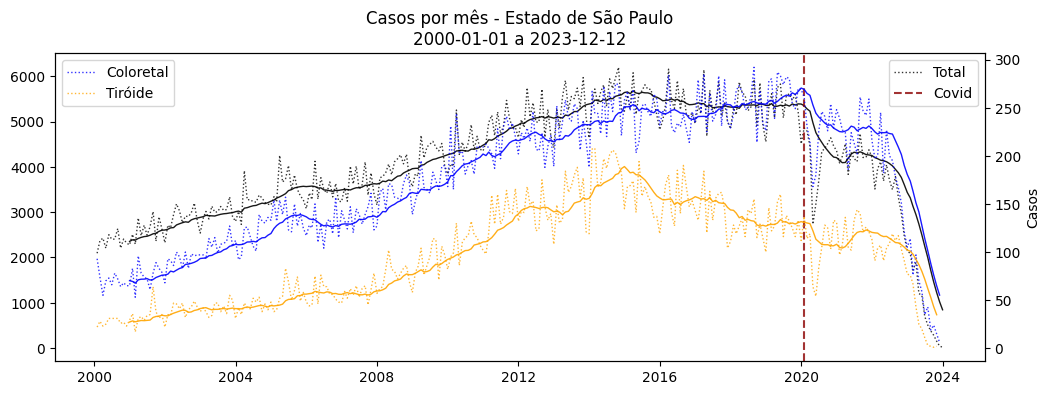

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df_cases, label='Total', color='k', alpha=.8, linestyle=':', lw=1)
ax1.plot(df_cases.rolling(12).mean(), color='k', alpha=.9, lw=1)

ax2 = ax1.twinx()

for tipo, color in zip(['Coloretal','Tiróide'],['b','orange']):
  ax2.plot(df[df['tipo_cancer'] == tipo].resample('M').cases.count(), label=tipo, color=color, alpha=.8, linestyle=':', lw=1)
  ax2.plot(df[df['tipo_cancer'] == tipo].resample('M').cases.count().rolling(12).mean(), color=color, alpha=.9, lw=1)

# Fev 2020
ax1.axvline(pd.to_datetime('2020-02-01'), color='darkred', linestyle='--', alpha=.8, label='Covid')

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Casos por mês - Estado de São Paulo\n' + str(df.DTDIAG.min()) + ' a ' + str(df.DTDIAG.max()))
plt.xticks(rotation=45)
ax1.legend()
ax2.legend()
plt.show()